In [3]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [33]:
y=df['quality']

In [34]:
x= df.drop(['Id', 'quality'], axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


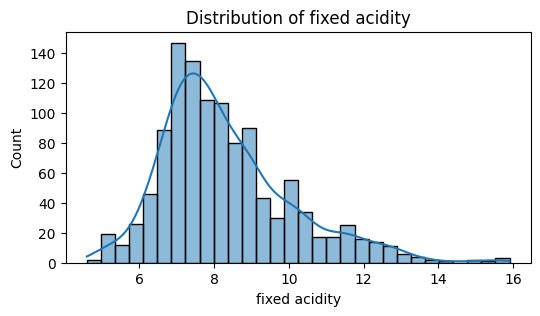

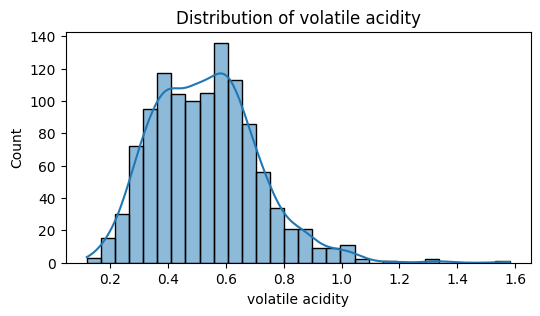

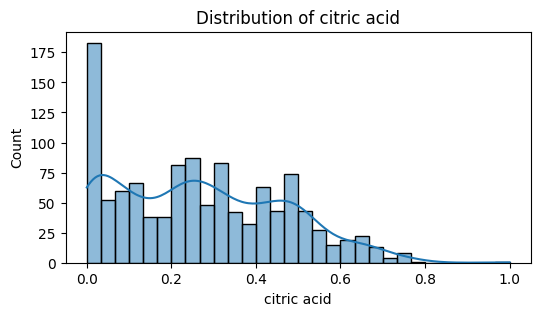

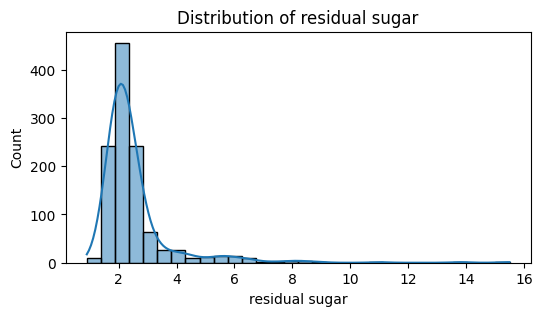

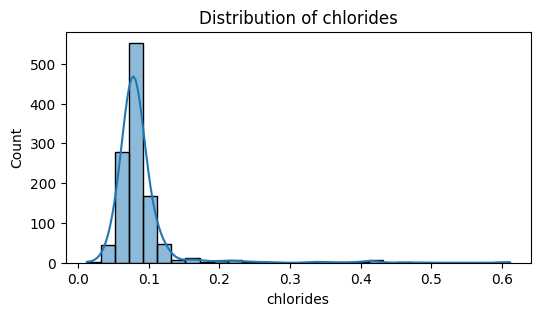

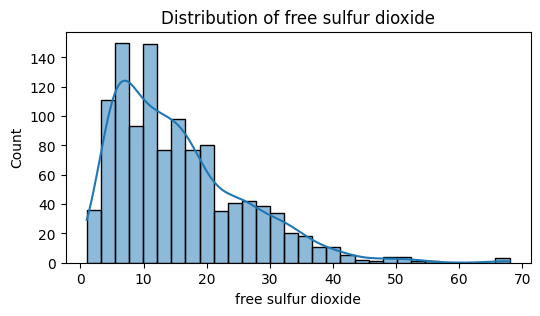

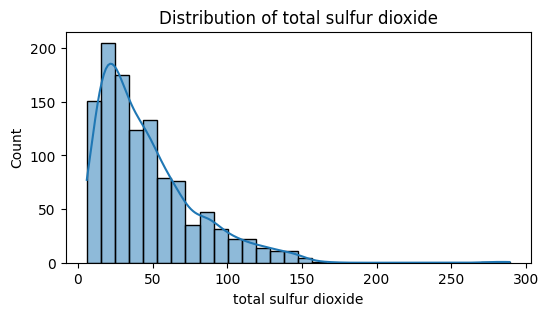

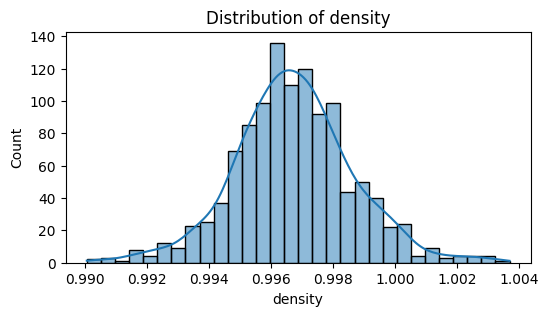

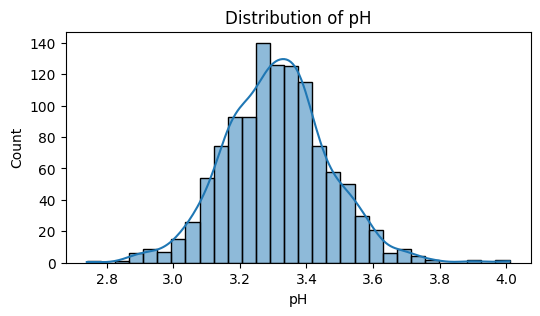

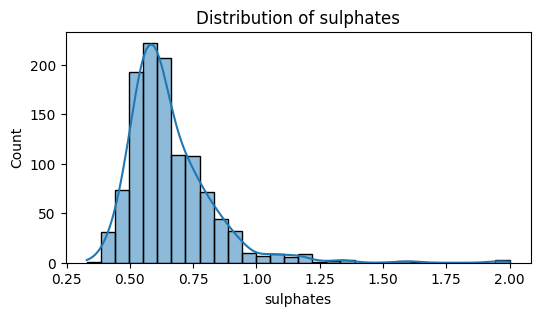

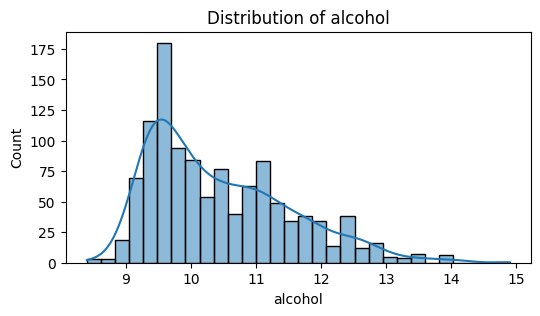

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each feature
x.columns  # list of feature names
for col in x.columns:
    plt.figure(figsize=(6,3))
    sns.histplot(x[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


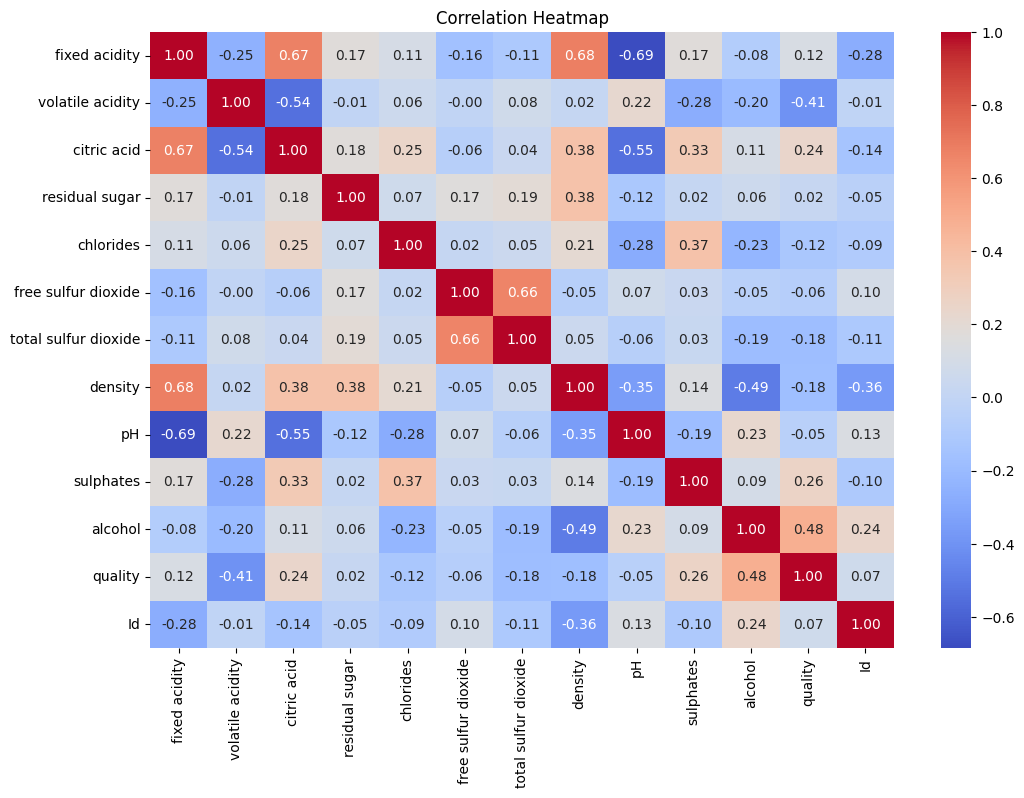

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of feature columns
features = x.columns  # all features in your X dataset

# 1️⃣ Correlation with target
corr_with_target = df[features.tolist() + ['quality']].corr()['quality'].sort_values(ascending=False)
print("Correlation with quality:\n", corr_with_target)




Correlation with quality:
 quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar log      0.030566
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [13]:
x.isnull().mean()*100

,0
fixed acidity,0.0
volatile acidity,0.0
citric acid,0.0
residual sugar,0.0
chlorides,0.0
free sulfur dioxide,0.0
total sulfur dioxide,0.0
density,0.0
pH,0.0
sulphates,0.0


In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(x)
X

array([[-0.52157961,  0.93933222, -1.36502663, ..., -0.57365783,
        -0.96338181, -0.5751539 ],
       [-0.29259344,  1.94181282, -1.36502663, ...,  0.1308811 ,
        -0.59360107,  0.23609684],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.04525363,
        -0.59360107, -0.09036246],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ..., -0.45623467,
         0.05351522, -0.44795816],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  0.60057372,
         0.70063152, -0.20581511],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  0.30701583,
        -0.22382033, -0.44795816]])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
svm = SVC(C=5,gamma=1,kernel='rbf', class_weight='balanced', random_state=3432)

svm.fit(X_train, y_train)

# 6. Predictions
y_pred = svm.predict(X_test)

# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6812227074235808

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.77      0.70        96
           6       0.69      0.65      0.67        99
           7       0.90      0.69      0.78        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.45      0.42      0.43       229
weighted avg       0.67      0.68      0.67       229


Confusion Matrix:
 [[ 0  4  2  0  0]
 [ 1 74 21  0  0]
 [ 1 32 64  2  0]
 [ 0  3  5 18  0]
 [ 0  1  1  0  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 5],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)


Best params: {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
